## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for plot creating the charts
- [pandas](https://python-graph-gallery.com/pandas/) is used to put the data into a dataframe
- `numpy` is used to generate some data

The **Student t-test** will be done using `scipy`: install it using the `pip install scipy` command

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Dataset

When creating **nice output tables**, we first need to have the dataframe with the values we want. 

In this post, we'll use *fake weather data* from different cities. We'll take a look at different simple features of [pandas](https://python-graph-gallery.com/pandas/)  to make this table more **aesthetically appealing**.

In [2]:
sample_size = 100

groupA = np.random.normal(10, 10, sample_size)
groupB = np.random.normal(40, 10, sample_size)

df = pd.DataFrame({'value': np.concatenate([groupA, groupB]),
                   'category': ['GroupA']*sample_size + ['GroupB']*sample_size})

## Get statistical values

First, we'll start by retrive the values we want to add on the plot: the **p value** and the **t statistic**. For this, we need to use the `ttest_rel()` function from `scipy`.

Also, we retrieve the **mean** of each group.

*Important: This post does not cover any statistical/math details*

In [3]:
# groups
groupA = df[df['category']=='GroupA']['value']
groupB = df[df['category']=='GroupB']['value']

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(groupA, groupB)

# Get means
mean_groupA = groupA.mean()
mean_groupB = groupB.mean()

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Mean groupA:", mean_groupA)
print("Mean groupB:", mean_groupB)

T-statistic: -21.422755428886422
P-value: 5.923713845065175e-39
Mean groupA: 10.795220725982492
Mean groupB: 39.594683650277446


Let's **round them** in order to make the chart **more readable** at the end

In [4]:
t_statistic = round(t_statistic,2)
p_value = round(p_value,5) # more decimal since it's a lower value in general
mean_groupA = round(mean_groupA,2)
mean_groupB = round(mean_groupB,2)

## Histogram with statistical elements

Now let's use the stats we got above and add them to the plot of [histograms](https://python-graph-gallery.com/histogram/) of each group using the `text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/)

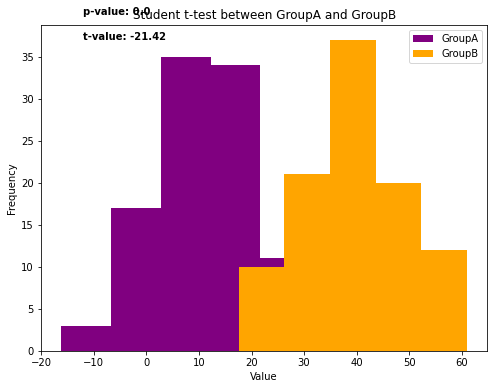

In [5]:
# Get group names and define colors
group_name = df['category'].unique()
colors = ['purple', 'orange']

# Init plots
fig, ax = plt.subplots(figsize=(8,6))

# Create the histograms
for i, group in enumerate(group_name):
    
    # Filter on the group
    subgroup = df[df['category']==group]['value']
    
    # Add histogram of the subgroup, with the right color
    ax.hist(subgroup, bins=5, color=colors[i])

# Add a legend
ax.legend(group_name)

# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(-12, 40, p_value_text, weight='bold')
t_value_text = f't-value: {t_statistic}'
ax.text(-12, 37, t_value_text, weight='bold')

# Add a title and axis label
ax.set_title('Student t-test between GroupA and GroupB')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

## Boxplot with statistical elements

Now let's use the stats we got above and add them to the plot of [boxplots](https://python-graph-gallery.com/boxplot/) of each group using the `text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/).

For this graph, we'll also add the **average of each group** next to its associated [boxplot](https://python-graph-gallery.com/boxplot/). 

*Warning: the positions of the texts need to be changed compared to the histogram plot.*

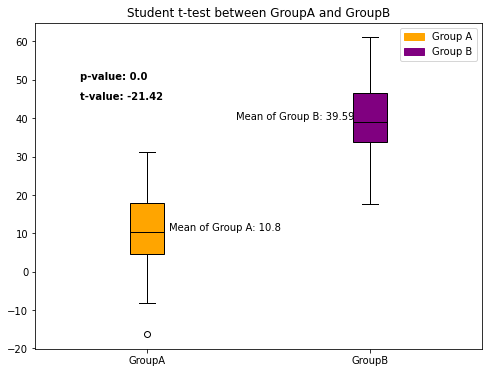

In [6]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['orange', 'purple']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
t_value_text = f't-value: {t_statistic}'
ax.text(0.7, 45, t_value_text, weight='bold')

# Add the mean for each group
ax.text(1.1, mean_groupA, f'Mean of Group A: {mean_groupA}')
ax.text(1.4, mean_groupB, f'Mean of Group B: {mean_groupB}')

# Add a title and axis label
ax.set_title('Student t-test between GroupA and GroupB')

# Add a legend
legend_labels = ['Group A', 'Group B']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()

## Going further

This post explains how to represent the **results of a student t-test** in a [histogram](https://python-graph-gallery.com/histogram/) and a [boxplot](https://python-graph-gallery.com/boxplot/).

For more examples of **charts with statistics**, see the [statistics section](https://python-graph-gallery.com/statistics/). You may also be interested in how to [create a mirror histogram chart](https://python-graph-gallery.com/density-mirror/).